In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

Se cargan los conjuntos de entrenamiento y prueba

In [237]:
train_df = pd.read_csv('./XOR_trn.csv', header=None)
test_df = pd.read_csv('./XOR_tst.csv', header=None)

Se normalizan los datos de las X y se reemplaza el valor -1 de las Y por 0 en ambos conjuntos de datos.

In [238]:
# Función para normalizar los datos entre 0 y 1
def normalize_data(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return np.vectorize(lambda x: 1 if x>=0.5 else 0)(normalized_data)
    
x_train = np.array([
    normalize_data(train_df[0].values),
    normalize_data(train_df[1].values)
])
y_train = np.array(train_df[2].replace(-1, 0).values)
x_test = np.array([
    normalize_data(test_df[0].values),
    normalize_data(test_df[1].values)
])
y_test = np.array(test_df[2].replace(-1, 0).values)

Se definen las funciones sigmoide y propagación.

In [239]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

def back_propagation(m,w1,w2,z1,a1,z2,a2,y):
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

Se define el modelo para resolver el problema de XOR

In [248]:
class XOR:
    def __init__ (self, n_i = 2, n_o = 1, n_h = 2, lr = 0.1, iters = 10000):
        self.n_x = n_i
        self.n_y = n_o
        self.n_h = n_h
        self.w1, self.w2 = None, None
        self.iters = iters
        self.losses = []

    def init_weights (self):
        self.w1 = np.random.rand(self.n_h, self.n_x)
        self.w2 = np.random.rand(self.n_y, self.n_h)

    def fit (self, x, y):
        m = x.shape[1]
        self.init_weights()
        for i in range(self.iters):
            z1,a1,z2,a2 = forward_propagation(self.w1, self.w2, x)
            loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
            self.losses.append(loss)
            da2,dw2,dz1,dw1 = back_propagation(m,self.w1,self.w2,z1,a1,z2,a2,y)
            self.w2 = self.w2-lr*dw2
            self.w1 = self.w1-lr*dw1
        return self

    def predict(self, input):
        z1,a1,z2,a2 = forward_prop(self.w1, self.w2, input)
        return np.vectorize(lambda y: 1 if y>=0.5 else 0)(np.squeeze(a2))

Se crea una lista con tres modelos de la cuál se escogera el que tenga mejor precisión.

In [241]:
model = max(
    [XOR(2, 1, 2) for i in range(0, 3)],
    key=lambda model: metrics.accuracy_score(y_train,model.fit(x_train, y_train).predict(x_train))
)
print(f'Accuracy with train dataset: {metrics.accuracy_score(y_train, model.predict(x_train))}')

Accuracy with train dataset: 1.0


Se gráfica la perdida conforme avanzan las iteraciones en el entreanmiento del modelo

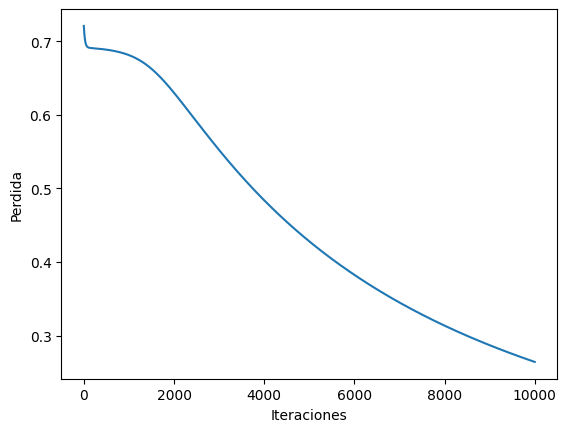

In [251]:
plt.plot(model.losses)
plt.xlabel("Iteraciones")
plt.ylabel("Perdida")
plt.savefig('./XOR-loss.png')
plt.show()

Se gráfican los resultados

Accuracy with test dataset: 1.0


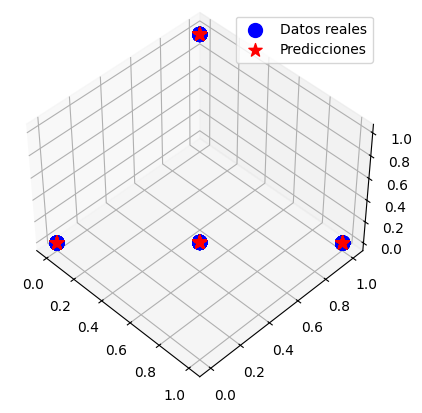

In [250]:
predictions = model.predict(x_test)
print(f'Accuracy with test dataset: {metrics.accuracy_score(y_test, predictions)}')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[0], x_test[1], y_test, c='b', marker='o', s=100, label="Datos reales")
ax.scatter(x_test[0], x_test[1], predictions, c='r', marker='*', s=100, label="Predicciones")
ax.view_init(elev=45, azim=-45)
plt.legend()
plt.savefig('./XOR-results.png')
plt.show()